First import ART package:

In [1]:
import sys
sys.path.append('../AutomatedRecommendationTool')
    
from art.core import *
import pickle

/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [43]:
data_file = './ART_training.csv'

In [44]:
df = pd.read_csv(data_file, index_col=0)
df = df.rename(columns={'Production': 'Isoprenol [mM]'})
df.head()

,Line Name,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Isoprenol [mM]
0,1,1,1,2,0,2,0,0,0,0.000000
1,2,1,2,2,2,2,1,1,0,0.552101
2,3,1,0,0,2,1,1,2,0,0.349196
3,4,1,1,1,1,2,2,1,0,0.551849
4,5,2,0,2,1,1,0,1,1,0.080117


In [45]:
df = df.set_index('Line Name').stack().reset_index()
df.columns = ['Line Name', 'Measurement Type', 'Value']
df.head()

,Line Name,Measurement Type,Value
0,1,ACCOAC,1.0
1,1,MDH,1.0
2,1,PTAr,2.0
3,1,CS,0.0
4,1,ACACT1r,2.0


In [46]:
filename = 'ART_training_EDDstyle.csv'
df.to_csv(filename, header=True, index=False)

In [2]:
data_file = './ART_training.csv'


In [3]:
df = pd.read_csv(data_file, index_col=0)
# df = df_S.rename(columns={'Isoprenol Concentration (mM)': 'Isoprenol [mM]'})

In [4]:
df.head()

,Line Name,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Production
0,1,1,1,2,0,2,0,0,0,0.000000
1,2,1,2,2,2,2,1,1,0,0.552101
2,3,1,0,0,2,1,1,2,0,0.349196
3,4,1,1,1,1,2,2,1,0,0.551849
4,5,2,0,2,1,1,0,1,1,0.080117


In [5]:
n_instances = len(df)
reactions = df.columns[1:-1].tolist()
response_var = df.columns[-1]
response_var


'Production'

Types of genetic modifications: 
- knockout (KO)
- no modification (NoMod)
- doubling the expression (UP)

In [6]:
n_reactions = len(reactions)
n_modifications = 3
reactions = reactions[:n_reactions]
tot_number_mod = n_modifications**n_reactions
print(f'Total number of possible modifications: {tot_number_mod}')
trainingset = n_instances/tot_number_mod*100
print(f'Training set size: {n_instances} ({trainingset:.2f}%)')

Total number of possible modifications: 6561
Training set size: 96 (1.46%)


In [7]:
df[df['Line Name']=='WT'][response_var]

95    0.46188
Name: Production, dtype: float64

In [8]:
max(df[response_var])

0.5726483723065023

Vamshi's vs Som's implementation:

Text(0.5, 0, 'strains')

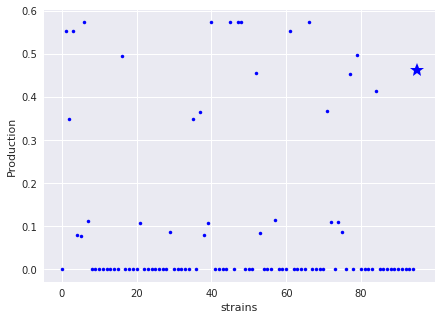

In [9]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(df[response_var],'.',color='blue')
ax.plot(95,df[df['Line Name']=='WT'][response_var],'b*',markersize=15)
ax.set_ylabel(response_var)
ax.set_xlabel('strains')

# Run ART with ordinal encoding of input variables

Pivot dataframe and change column names

In [10]:
df = df.set_index('Line Name').stack().reset_index()
df.columns = ['Line Name', 'Measurement Type', 'Value']
df.head()

,Line Name,Measurement Type,Value
0,1,ACCOAC,1.0
1,1,MDH,1.0
2,1,PTAr,2.0
3,1,CS,0.0
4,1,ACACT1r,2.0


## Train ART

Next define a dictionary that contains the settings that ART will use to find the recommended designs:

In [11]:
art_params = {}
art_params['response_var'] = [response_var]
art_params['input_var'] = reactions
art_params['seed'] = 10  
art_params['num_recommendations'] = 96   
art_params['cross_val'] = True
art_params['recommend'] = False
art_params['output_directory'] = './data/art_output/'

Run ART with seed (takes around 3h) or load previously run model.

In [12]:
run_art = True

In [13]:
%%time
if run_art:
    art = RecommendationEngine(df, **art_params)
else:
    with open(os.path.join(art_params['output_directory'], 'art.pkl'), 'rb') as output:
        art = pickle.load(output)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
The acceptance probability does not match the target. It is 0.6545526842795099, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8883584242243232, but should be close to 0.8. Try to increase the number of tuning steps.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9015901669475451, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8852040587293577, but should be close to 0.8. Try to increase the number of tuning steps.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6869213919072221, but should be close to 0.8. Try to increase the number of tuning steps.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


CPU times: user 22min 15s, sys: 12min 44s, total: 34min 59s
Wall time: 19min 2s


In [14]:
art.evaluate_models_cv()

,MAE,MRAE(%),StdAE,MSE,$R^2$
Name,,,,,
Neural Regressor,0.204695,inf,0.155110,0.065959,-0.730867
Random Forest Regressor,0.025846,NaN,0.049933,0.003161,0.917041
TPOT Regressor,0.005761,NaN,0.013908,0.000227,0.994053
Support Vector Regressor,0.106237,inf,0.074775,0.016878,0.557107
Kernel Ridge Regressor,0.092691,inf,0.078948,0.014824,0.610984
K-NN Regressor,0.118036,NaN,0.101839,0.024304,0.362237
Gaussian Process Regressor,0.086795,inf,0.076816,0.013434,0.647469
Gradient Boosting Regressor,0.053197,inf,0.052114,0.005546,0.854471
Ensemble Model,0.008033,inf,0.014444,0.000273,0.992832


In [15]:
os.rename(art.outDir + '/metric0.csv', art.outDir + '/metric.csv')
os.rename(art.outDir + '/cv_metric0.csv', art.outDir + '/cv_metric.csv')

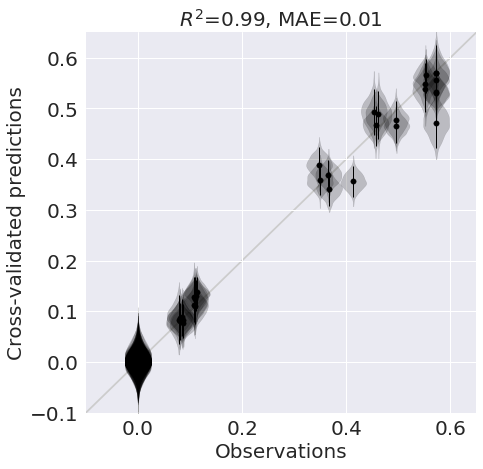

In [16]:
plot.predictions_distr_vs_observations(art, cv_flag=True, 
                                       xlim=[[-0.1, 0.65]], ylim=[[-0.1, 0.65]],
                                       widths=0.05)

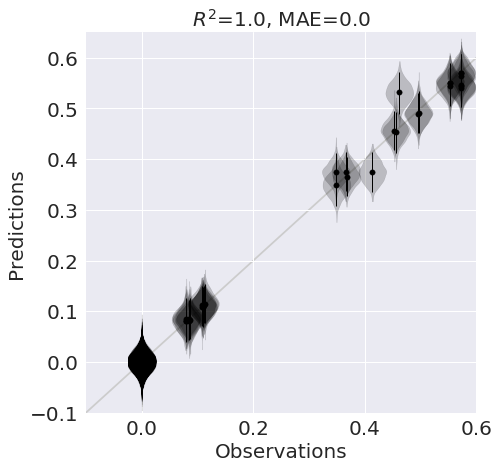

In [17]:
plot.predictions_distr_vs_observations(art, cv_flag=False, 
                                       xlim=[[-0.1, 0.6]], ylim=[[-0.1, 0.65]],
                                       widths=0.05)

In [18]:
utils.save_pkl_object(art)


## Recommend new designs

Create the set of all possible designs:

In [21]:
num_of_designs = n_modifications**n_reactions
num_of_reactions = art.num_input_var
strains = np.zeros((num_of_designs, num_of_reactions))
num_of_designs

6561

In [50]:
i = 0

for d1 in range(3):
    for d2 in range(3):
        for d3 in range(3):
            for d4 in range(3):
                for d5 in range(3):
                    for d6 in range(3):
                        for d7 in range(3):
                            for d8 in range(3):
                                strains[i,:] = np.hstack((d1,d2,d3,d4,d5,d6,d7,d8)).astype(int)
                                i+=1

Calculate mean predicted production and standard deviation for all possible designs.

In [51]:
pp_mean, pp_std = art.post_pred_stats(strains)


The relative engineering accuracy is set to one percent to make sure recommendations are different from the input data.

In [52]:
art.rel_eng_accuracy = 0.01

#### Exploitative approach

Objective function is defined as the mean predicted production (the parameter for exploration is set to $\alpha=0$).

In [70]:
obj_func = pp_mean 
data = np.hstack((strains, obj_func, obj_func))

In [71]:
art.recommend(data=data)
ind_max = np.argmax(art.recommendations.values[:,-1])
mean, std = art.post_pred_stats(art.recommendations.values[ind_max,:-1])
print(f'Mean and standard deviation of the recommendation with the highest predicted production are: {mean[0][0]:.2f}, {std[0][0]:.2f}')

Mean and standard deviation of the recommendation with the highest predicted production are: 0.57, 0.02


In [72]:
art.recommendations.tail()

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Production
91,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,0.559809
92,2.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,0.559718
93,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.559676
94,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.559666
95,1.0,2.0,2.0,1.0,2.0,1.0,0.0,2.0,0.559527


In [29]:
rec = art.recommendations
n_rec = len(rec)
rec.loc[n_rec] = [[list(rec[reaction]).count(int(i))/n_rec*100 
                   for i in range(3)]  for reaction in reactions] + [np.mean(rec[response_var])]

rec.iloc[-1]

ACCOAC        [0.0, 44.79166666666667, 55.208333333333336]
MDH                                  [0.0, 46.875, 53.125]
PTAr          [0.0, 51.041666666666664, 48.95833333333333]
CS             [0.0, 35.41666666666667, 64.58333333333334]
ACACT1r                                [0.0, 43.75, 56.25]
PPC           [0.0, 47.91666666666667, 52.083333333333336]
PPCK                                     [100.0, 0.0, 0.0]
PFL           [0.0, 57.291666666666664, 42.70833333333333]
Production                                        0.565362
Name: 96, dtype: object

In [66]:
def plot_distribution(dataframe): 
    bar_height = 1
    labels = ['KO', 'NoMod', 'UP']
    colors = ['#019600', 'grey', '#219AD8']
    
    sns.set_style("white")
    
    n_rec = len(dataframe)
    dataframe.loc[n_rec] = [[list(dataframe[reaction]).count(int(i))/dataframe*100 
                       for i in range(3)]  for reaction in reactions] + [np.mean(dataframe[response_var])]

    
    data = [ [dataframe.iloc[-1][r][num] for r in reactions] 
            for num in range(n_modifications)]
    
    y_pos = np.arange(len(reactions))

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)

    # Remove frame
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    patch_handles = []
    # left alignment of data starts at zero
    left = np.zeros(len(reactions)) 
    for i, d in enumerate(data):
        patch_handles.append(ax.barh(y_pos, d, 
                                     color=colors[i%len(colors)], edgecolor='white',
                                     height=bar_height, align='center', 
                                     left=left, label=labels[i]))
        left += d

    # search all of the bar segments and annotate
    for j in range(n_modifications):
        for i, patch in enumerate(patch_handles[j].get_children()):
            bl = patch.get_xy()
            x = 0.5*patch.get_width() + bl[0]
            y = 0.5*patch.get_height() + bl[1]
            ax.text(x,y, "%d%%" % (data[j][i]), ha='center')

    ax.set_title('Distribution of modifications')
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', 
                    labelbottom='off')
    plt.yticks(y_pos, reactions)
    ax.invert_yaxis()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


ValueError: cannot copy sequence with size 96 to array axis with dimension 9

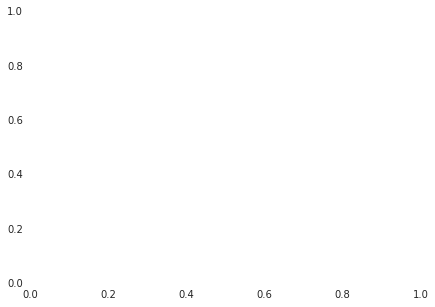

In [67]:
plot_distribution(art.recommendations)

Change the last column name to indicate it is predicted

In [73]:
art.recommendations = art.recommendations.rename(columns={art_params['response_var'][0]: 'Isoprenol [mM] Pred'})


In [75]:
art.recommendations.insert(loc=0, column='Line Name', value=[str(i) for i in range(1,art_params['num_recommendations']+1)])
art.recommendations.tail()

,Line Name,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Isoprenol [mM] Pred
91,92,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,0.559809
92,93,2.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,0.559718
93,94,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.559676
94,95,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.559666
95,96,1.0,2.0,2.0,1.0,2.0,1.0,0.0,2.0,0.559527


In [76]:
rec_filename = f'{art.outDir}/recommendations_exploit.csv'
art.recommendations.to_csv(rec_filename, header=True, index=False)

#### Explorative approach

Objective function is defined as the variance of the predicted production (the parameter for exploration is set to $\alpha=1$)

In [77]:
obj_func = pp_std 
data = np.hstack((strains, obj_func, obj_func))

In [78]:
art.recommend(data=data)
ind_max = np.argmax(art.recommendations.values[:,-1])
mean, std = art.post_pred_stats(art.recommendations.values[ind_max,:-1])
print(f'Mean and standard deviation of the recommendation with the highest predicted production are: {mean[0][0]:.2f}, {std[0][0]:.2f}')

Mean and standard deviation of the recommendation with the highest predicted production are: 0.56, 0.02


In [39]:
rec = art.recommendations
n_rec = len(rec)
rec.loc[n_rec] = [[list(rec[reaction]).count(int(i))/n_rec*100 
                   for i in range(3)]  for reaction in reactions] + [np.mean(rec[response_var])]

rec.iloc[-1]

ACCOAC             [0.0, 60.416666666666664, 39.58333333333333]
MDH              [43.75, 42.70833333333333, 13.541666666666666]
PTAr          [26.041666666666668, 32.29166666666667, 41.666...
CS                  [0.0, 95.83333333333334, 4.166666666666666]
ACACT1r             [0.0, 67.70833333333334, 32.29166666666667]
PPC                [0.0, 57.291666666666664, 42.70833333333333]
PPCK            [46.875, 16.666666666666664, 36.45833333333333]
PFL           [36.45833333333333, 23.958333333333336, 39.583...
Production                                             0.457579
Name: 96, dtype: object

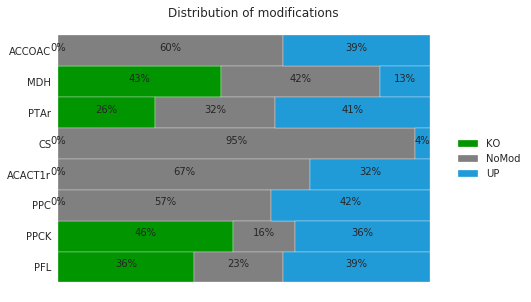

In [40]:
plot_distribution(rec)

In [79]:
art.recommendations = art.recommendations.rename(columns={art_params['response_var'][0]: 'Isoprenol [mM] Pred'})
art.recommendations.head()

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Isoprenol [mM] Pred
0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.525587
1,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.526182
2,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,0.525406
3,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.526031
4,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,0.525907


In [81]:
art.recommendations.insert(loc=0, column='Line Name', value=[str(i) for i in range(1,art_params['num_recommendations']+1)])
art.recommendations.tail()

,Line Name,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Isoprenol [mM] Pred
91,92,2.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.349293
92,93,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.349845
93,94,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.362089
94,95,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.529451
95,96,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.529603


In [82]:
rec_filename = f'{art.outDir}/recommendations_explor.csv'
art.recommendations.to_csv(rec_filename, header=True, index=False)